In [1]:
import sympy as sp
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline


def partial_diff(f, var):
    """Creates a list of the partial derivatives of f with respect to the entries of
    the list var."""
    pds = []
    for i in var:
        pds += [f.diff(i)]
    if len(pds) != 1:
        return pds
    else:
        return pds[0]
    
def bisect(f, start, end, iterations):
    bracket = [start, end]
    if f(bracket[0]) > f(bracket[1]):
        bracket = [bracket[1], bracket[0]]
    for i in range(iterations):
        midx = (bracket[0]+bracket[1])/2
        midy = f(midx)
        if midy < 0:
            bracket[0] = midx
        else:
            bracket[1] = midx
    return bracket

def secant(f, x, error=0.001, limit=100):
    while limit > 0:
        xnew = x[1] - f(x[1])*((x[1] - x[0])/
                             (f(x[1]) - f(x[0])))
        x = [x[1], xnew]
        if abs(sp.pi/8 - xnew) < .01:
            return round(xnew, math.ceil(-math.log(error, 10)))
        limit -= 1



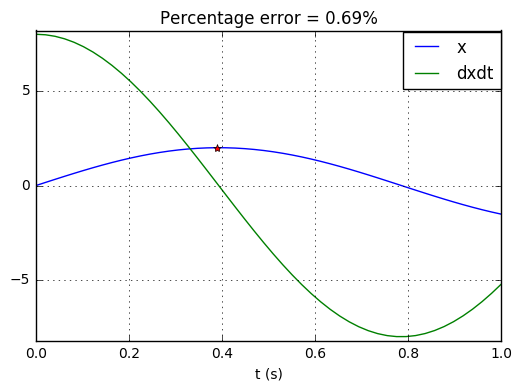

In [3]:
t = sp.symbols('t')
x = 2*sp.sin(4*t)
dxdt = partial_diff(x, [t])
f = sp.lambdify(t, x)
dfdt = sp.lambdify(t, dxdt)
bracket = bisect(dfdt, 0, 1, 2)
root = secant(dfdt, bracket, 0.01)
percent = round(abs(root - np.pi/8)/(np.pi/8)*100, 2)

points = np.linspace(0, 1, 50)
y = [f(x) for x in points]
dy = [dfdt(x) for x in points]

plt.plot(points, y)
plt.plot(points, dy)
plt.plot(root, f(root), 'o', marker='*')
plt.xlabel('t (s)')
plt.ylim(-8.2, 8.2)
plt.grid(True)
plt.title('Percentage error = ' + str(percent) + '%')

blue_line = mlines.Line2D([], [], color='blue',
                          markersize=15, label='x')
green_line = mlines.Line2D([], [], color='green',
                          markersize=15, label='dxdt')
plt.legend(bbox_to_anchor=(0.913, 0.918), bbox_transform=plt.gcf().transFigure, 
           handles=[blue_line, green_line])